In [202]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px

import os
from dotenv import load_dotenv

load_dotenv(os.path.join('.env'))

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

FRED_KEY = os.environ.get("FRED_KEY")

### 1. Create The FRED Object

In [203]:
fred = Fred(api_key = FRED_KEY)

### 2. Search for economic data

In [204]:
sp_search = fred.search('S&P', order_by='popularity')

In [205]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-06-28,2024-06-28,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-06-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-27 08:45:09-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-06-28,2024-06-28,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-06-25 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-06-28,2024-06-28,S&P 500,2014-06-30,2024-06-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-06-27 19:56:53-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-06-28,2024-06-28,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-06-28,2024-06-28,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-06-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-27 08:45:12-05:00,82,This data represents the effective yield of th...


### 3. Pull Raw Data

<Axes: title={'center': 'S&P 500'}>

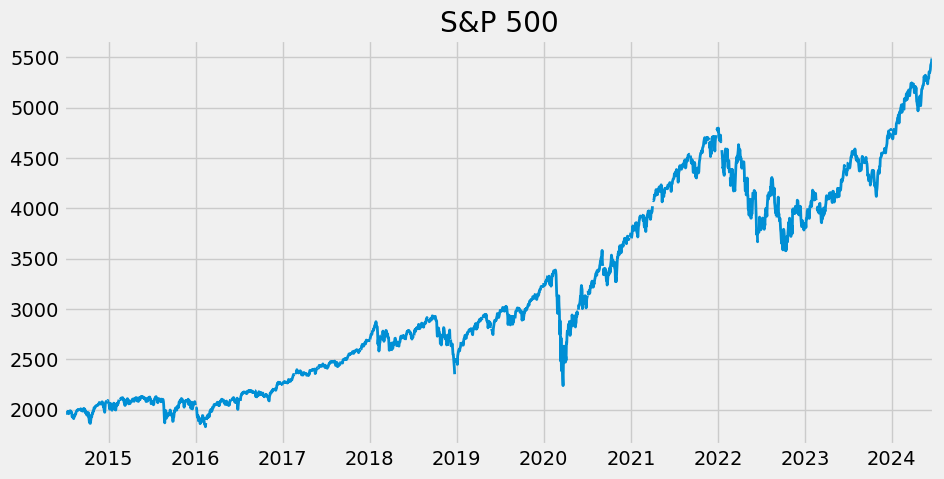

In [206]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

#### 2014-06-27	- 1$ = 183,5 тенге
### 1 S&P = 1960$ = 359 000 тенге

## 10 years later

#### 2024-06-26 - 1$ = 465,13 тенге
### 1 S&P = 5477.90$ = 2 547 935 тенге



### 4. Pull and Join Multiple Data Series

In [207]:
unemp_results=fred.search('unemployment')

In [208]:
unemp_df=fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df=unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [209]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unempt_results = pd.concat(all_results, axis=1).drop(['M08311USM156SNBR', 'M0892BUSM156SNBR', 'M0892AUSM156SNBR', \
                                                       'LNS14000006', 'LNS14000024', 'LNS14000031', 'LNS14000002', 'LNS14000009', \
                                                       'LNS14000003', 'LNS14000001','LNS14027660', 'U2RATE',\
                                                        'LNS14000001','LNS14027660', 'LNS14027662','LNS14024887','LRUN64TTUSM156S','LNS14032183','LNS14000012', 'LNS14027659','LASMT261982000000003','LNS14000060','LNS14000028','LASMT391746000000003','LNS14000018', \
                                                        'LNS14000036', 'LNS14000032','LNS14200000','LRUN24TTUSM156S','LNS14027689','LNS14100000','LNS14000315','LNS14000029','LRHUTTTTUSM156S','LNS14024230', \
                                                            'LNS14000025','LNS14000061','LRUNTTTTUSM156S','LNS14000026','LNS14000048','LNS14000089','LNS14000150','LRUN25TTUSM156S'], axis=1)

In [210]:
unemp_states=unempt_results.drop('UNRATE', axis=1)
unemp_states.dropna()

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,NDUR,MTUR,DCUR,MSUR,MEUR,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR,CMWRUR,CSOUUR,CNERUR,CWSTUR,CNEWUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2,6.8,6.9,9.6,8.6,9.6
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1,6.7,6.8,9.5,8.5,9.4
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1,6.6,6.7,9.5,8.5,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,5.2,3.9,4.5,3.1,3.4,3.7,4.0,2.9,3.0,3.5,4.7,4.8,3.1,3.4,4.2,3.2,3.0,4.3,3.0,4.0,2.7,3.5,4.6,2.3,4.1,4.3,5.3,3.7,3.5,3.3,4.6,3.0,2.8,5.7,3.5,4.1,3.1,1.9,3.3,5.0,3.2,3.4,2.5,4.4,3.3,2.6,3.6,2.6,2.8,4.1,2.3,2.1,3.6,3.4,4.0,4.6,3.4
2024-02-01,5.3,3.9,4.4,3.1,3.4,3.7,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.5,4.1,3.0,3.0,4.4,3.1,3.9,2.7,3.3,4.7,2.4,4.2,4.3,5.2,3.6,3.6,3.3,4.6,3.0,2.8,5.7,3.5,4.2,3.1,2.0,3.4,5.1,3.1,3.4,2.5,4.5,3.3,2.6,3.9,2.7,2.8,4.0,2.3,2.1,3.6,3.4,4.0,4.6,3.4
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.7,3.8,3.0,2.9,4.5,3.1,3.8,2.7,3.2,4.8,2.5,4.2,4.3,5.1,3.5,3.5,3.3,4.6,2.9,2.8,5.8,3.5,4.4,3.1,2.0,3.3,5.2,3.0,3.3,2.5,4.5,3.3,2.6,4.1,2.7,2.8,3.9,2.2,2.1,3.6,3.4,3.9,4.6,3.3
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.2,3.8,2.7,3.1,4.8,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,5.8,3.6,4.3,3.1,2.0,3.1,5.2,2.8,3.1,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0,3.6,3.5,3.9,4.6,3.3


In [211]:
# Create the line plot with custom size
fig = px.line(unemp_states, 
              title='Unemployment Rates by State',  # Adding a title for clarity
              width=800,  # Set the width of the figure
              height=600)  # Set the height of the figure


# Show the plot
fig.show()


### Pull April 2024 Unemployment Rate Per State

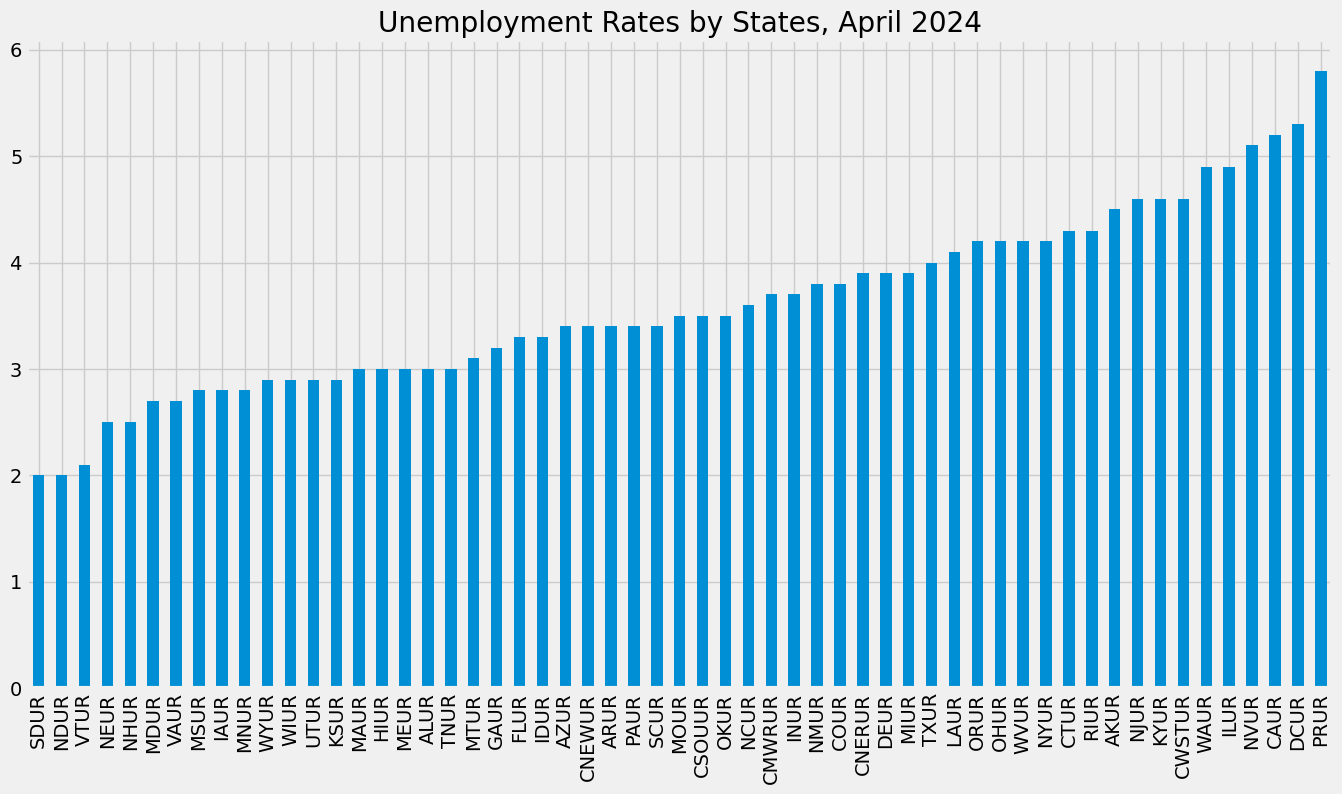

In [216]:
ax=unemp_states.loc[unemp_states.index == '2024-05-01'].T.sort_values('2024-05-01') \
      .sort_values('2024-05-01') \
      .plot(kind='bar', figsize=(15,8), title='Unemployment Rates by States, April 2024')

ax.legend().remove()
plt.show()

In [229]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').drop(['M08311USM156SNBR', 'M0892BUSM156SNBR', 'M0892AUSM156SNBR', \
                                                       'LNS14000006', 'LNS14000024', 'LNS14000031', 'LNS14000002', 'LNS14000009', \
                                                       'LNS14000003', 'LNS14000001','LNS14027660', 'U2RATE',\
                                                        'LNS14000001','LNS14027660', 'LNS14027662','LNS14024887','LRUN64TTUSM156S','LNS14032183','LNS14000012', 'LNS14027659','LASMT261982000000003','LNS14000060','LNS14000028','LASMT391746000000003','LNS14000018', \
                                                        'LNS14000036', 'LNS14000032','LNS14200000','LRUN24TTUSM156S','LNS14027689','LNS14100000','LNS14000315','LNS14000029','LRHUTTTTUSM156S','LNS14024230', \
                                                            'LNS14000025','LNS14000061','LRUNTTTTUSM156S','LNS14000026','LNS14000048','LNS14000089','LNS14000150','LRUN25TTUSM156S']).to_dict()

In [235]:
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [236]:
unemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Puerto Rico,Indiana,Louisiana,Hawaii,North Dakota,Montana,the District of Columbia,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota,Midwest Census Region,South Census Region,Northeast Census Region,West Census Region,New England Census Division
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,5.2,3.9,4.5,3.1,3.4,3.7,4.0,2.9,3.0,3.5,4.7,4.8,3.1,3.4,4.2,3.2,3.0,4.3,3.0,4.0,2.7,3.5,4.6,2.3,4.1,4.3,5.3,3.7,3.5,3.3,4.6,3.0,2.8,5.7,3.5,4.1,3.1,1.9,3.3,5.0,3.2,3.4,2.5,4.4,3.3,2.6,3.6,2.6,2.8,4.1,2.3,2.1,3.6,3.4,4.0,4.6,3.4
2024-02-01,5.3,3.9,4.4,3.1,3.4,3.7,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.5,4.1,3.0,3.0,4.4,3.1,3.9,2.7,3.3,4.7,2.4,4.2,4.3,5.2,3.6,3.6,3.3,4.6,3.0,2.8,5.7,3.5,4.2,3.1,2.0,3.4,5.1,3.1,3.4,2.5,4.5,3.3,2.6,3.9,2.7,2.8,4.0,2.3,2.1,3.6,3.4,4.0,4.6,3.4
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.7,3.8,3.0,2.9,4.5,3.1,3.8,2.7,3.2,4.8,2.5,4.2,4.3,5.1,3.5,3.5,3.3,4.6,2.9,2.8,5.8,3.5,4.4,3.1,2.0,3.3,5.2,3.0,3.3,2.5,4.5,3.3,2.6,4.1,2.7,2.8,3.9,2.2,2.1,3.6,3.4,3.9,4.6,3.3
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.2,3.8,2.7,3.1,4.8,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,5.8,3.6,4.3,3.1,2.0,3.1,5.2,2.8,3.1,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0,3.6,3.5,3.9,4.6,3.3
